In [1]:
import pandas as pd
import numpy as np

# Loading Datasets

In [2]:
plant_master = pd.read_excel("Plant Master.xlsx")
customer_data = pd.read_excel("Customer_Data.xlsx")
finalinvoice = pd.read_csv("Final_invoice - Copy.csv")
JTD = pd.read_csv("JTD - Copy.csv")

C:\Users\rkbis\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Cleaning Plant Data

In [3]:
# Dropping columns from plant_master and saving it to new df plant
plant = plant_master.drop(columns=['Vendor number plant', 'Valuation Area', 
                                      'Factory calendar', 'Name 2', 'House number and street', 'PO Box',
                                       'Customer no. - plant','Name 1'])

In [4]:
plant.isnull().sum()

Plant                 0
Postal Code           0
City                  0
Sales organization    5
State                 0
dtype: int64

In [5]:
# filling missing values with mode in column 'Sales organization'
plant['Sales organization'] = plant['Sales organization'].fillna(plant['Sales organization'].mode()[0])

In [6]:
plant.shape

(438, 5)

In [7]:
plant.isnull().sum()

Plant                 0
Postal Code           0
City                  0
Sales organization    0
State                 0
dtype: int64

# Cleaning Customer Data

In [8]:
customer_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [9]:
customer_data.shape

(555338, 9)

In [10]:
customer_data.isnull().sum()/len(customer_data["Business Partner"])*100

Business Partner     0.000000
Customer No.         0.000000
Partner Type         0.014046
Data Origin          0.024490
Title                8.338525
Marital Status      97.112209
Occupation          97.378533
Date of Birth       97.579132
Death date          99.880613
dtype: float64

In [11]:
# Deleting columns with 90% and above NaN
customer = customer_data.drop(columns = ['Marital Status', 'Occupation', 'Date of Birth', 'Death date'])

In [12]:
# Deleting Column 'Business Partner' which is just a copy of column 'Customer No.'
customer = customer.drop(columns='Business Partner')

In [13]:
customer.isna().sum()/555338*100

Customer No.    0.000000
Partner Type    0.014046
Data Origin     0.024490
Title           8.338525
dtype: float64

In [14]:
# There are still some columns with missing values need sto be filled.
# filling columns with mode method.
customer['Partner Type'] = customer['Partner Type'].fillna(customer['Partner Type'].mode()[0])
customer['Data Origin'] = customer['Data Origin'].fillna(customer['Data Origin'].mode()[0])
customer['Title'] = customer['Title'].fillna(customer['Title'].mode()[0])

In [15]:
customer.isnull().sum()

Customer No.    0
Partner Type    0
Data Origin     0
Title           0
dtype: int64

# Cleaning Invoice Data

In [16]:
finalinvoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,...,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,...,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,...,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [17]:
finalinvoice.shape

(492314, 59)

In [18]:
finalinvoice.isna().sum()/len(finalinvoice["CITY"])*100

Unnamed: 0                0.000000
Amt Rcvd From Custom     40.073205
Amt Rcvd From Ins Co     40.073205
Area / Locality           4.852594
CGST(14%)                40.073205
CGST(2.5%)               40.073205
CGST(6%)                 40.073205
CGST(9%)                 40.073205
CITY                      0.000203
Cash /Cashless Type      94.430384
Claim No.                99.024200
Cust Type                 0.000000
Customer No.              0.000000
District                  0.000000
Expiry Date              95.484386
Gate Pass Date           91.689247
Gate Pass Time            0.000000
IGST(12%)                40.073205
IGST(18%)                40.073205
IGST(28%)                40.073205
IGST(5%)                 40.073205
Insurance Company        95.208140
Invoice Date              0.000000
Invoice No                0.000000
Invoice Time              0.000000
Job Card No               0.000000
JobCard Date              0.000000
JobCard Time              0.000000
KMs Reading         

In [19]:
# Removing Unnecessary Columns
columns_delete = ['Unnamed: 0','Amt Rcvd From Custom','Amt Rcvd From Ins Co',
                'CGST(14%)','CGST(2.5%)','CGST(6%)','CGST(9%)',
                'IGST(12%)','IGST(18%)','IGST(28%)','IGST(5%)',
                'SGST/UGST(14%)','SGST/UGST(2.5%)','SGST/UGST(6%)','SGST/UGST(9%)',
                'Total CGST','Total GST','Total IGST','Total SGST/UGST',
                'Outstanding Amt','TDS amount','Cash /Cashless Type','Claim No.',
                 'Gate Pass Date','Insurance Company','Expiry Date',
                 'Policy no.','Service Advisor Name','ODN No.','Regn No',
                 'Recovrbl Exp','Technician Name','Total Value','Area / Locality']
invoice = finalinvoice.drop(columns=columns_delete)

In [20]:
invoice.isna().sum()/len(invoice["CITY"])*100

CITY                  0.000203
Cust Type             0.000000
Customer No.          0.000000
District              0.000000
Gate Pass Time        0.000000
Invoice Date          0.000000
Invoice No            0.000000
Invoice Time          0.000000
Job Card No           0.000000
JobCard Date          0.000000
JobCard Time          0.000000
KMs Reading           0.000000
Labour Total          0.000000
Make                  0.000000
Misc Total            0.000000
Model                 0.309762
OSL Total             0.000000
Order Type            0.000000
Parts Total           0.000000
Pin code              0.000000
Plant                 0.000000
Plant Name1           0.000000
Print Status          0.000000
Total Amt Wtd Tax.    0.000000
User ID               0.000000
dtype: float64

In [21]:
# filling NaN values with Mode method.
invoice['Cust Type'] = invoice['Cust Type'].fillna(invoice['Cust Type'].mode()[0])
invoice['CITY'] = invoice['CITY'].fillna(invoice['CITY'].mode()[0])
invoice['Model']  = invoice['Model'].fillna(invoice['Model'].mode()[0])

In [22]:
invoice.isnull().sum().sort_values()

CITY                  0
Print Status          0
Plant Name1           0
Plant                 0
Pin code              0
Parts Total           0
Order Type            0
OSL Total             0
Model                 0
Misc Total            0
Make                  0
Total Amt Wtd Tax.    0
Labour Total          0
JobCard Time          0
JobCard Date          0
Job Card No           0
Invoice Time          0
Invoice No            0
Invoice Date          0
Gate Pass Time        0
District              0
Customer No.          0
Cust Type             0
KMs Reading           0
User ID               0
dtype: int64

# Merging Invoice & Customer Dataset

In [23]:
invoice['Customer No.'] = invoice['Customer No.'].str.lstrip('0')

In [24]:
customer['Customer No.'] = customer['Customer No.'].astype(str)

In [25]:
invoice_customer = pd.merge(invoice, customer, on='Customer No.')

In [26]:
invoice_customer.head()

,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,...,Parts Total,Pin code,Plant,Plant Name1,Print Status,Total Amt Wtd Tax.,User ID,Partner Type,Data Origin,Title
0,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,...,2348.75,400601,BC01,THANE,NO,4051.95,BC01FS1,1.0,Z007,2.0
1,Thane,Retail,67849,Maharashtra,00:00:00,2014-08-14,7000137359,17:54:30,136482,2014-08-08,...,4230.25,400601,BC01,THANE,NO,11470.10,BC01FS1,1.0,Z007,2.0
2,Thane,Retail,67849,Maharashtra,00:00:00,2014-08-16,7000137489,10:52:30,135895,2014-08-06,...,14546.14,400601,BC01,THANE,NO,28344.28,BC01FS1,1.0,Z007,2.0
3,Thane,Retail,67849,Maharashtra,00:00:00,2014-10-09,7000151113,17:35:30,150383,2014-10-06,...,200.00,400601,BC01,THANE,NO,200.00,BC01SA1,1.0,Z007,2.0
4,Thane,Retail,67849,Maharashtra,00:00:00,2014-12-31,7000175211,18:41:00,168210,2014-12-13,...,20348.81,400601,BC01,THANE,NO,30458.92,BC01FS1,1.0,Z007,2.0


# Merging with Plant

In [27]:
invoice_customer_plant = pd.merge(invoice_customer, plant, on='Plant')

In [28]:
invoice_customer_plant.shape

(255761, 32)

In [29]:
invoice_customer_plant.isnull().sum()

CITY                  0
Cust Type             0
Customer No.          0
District              0
Gate Pass Time        0
Invoice Date          0
Invoice No            0
Invoice Time          0
Job Card No           0
JobCard Date          0
JobCard Time          0
KMs Reading           0
Labour Total          0
Make                  0
Misc Total            0
Model                 0
OSL Total             0
Order Type            0
Parts Total           0
Pin code              0
Plant                 0
Plant Name1           0
Print Status          0
Total Amt Wtd Tax.    0
User ID               0
Partner Type          0
Data Origin           0
Title                 0
Postal Code           0
City                  0
Sales organization    0
State                 0
dtype: int64

In [30]:
columns = invoice_customer_plant.columns

In [31]:
for i in columns:
    x = len(invoice_customer_plant[i].unique())
    print((x) ,' : ',(x/492314*100),' : ' ,i)

13874  :  2.81812014283567  :  CITY
6  :  0.0012187343849656928  :  Cust Type
153802  :  31.240630979415577  :  Customer No.
36  :  0.007312406309794156  :  District
5943  :  1.2071564083085187  :  Gate Pass Time
1566  :  0.31808967447604575  :  Invoice Date
255761  :  51.95078750553509  :  Invoice No
44485  :  9.03589985253314  :  Invoice Time
253207  :  51.43201290233469  :  Job Card No
1613  :  0.32763642715827707  :  JobCard Date
40211  :  8.167754725642578  :  JobCard Time
124458  :  25.280207347343364  :  KMs Reading
91630  :  18.61210528240107  :  Labour Total
28  :  0.0056874271298398985  :  Make
14725  :  2.9909773031033042  :  Misc Total
242  :  0.049155620193616266  :  Model
6194  :  1.2581401300795834  :  OSL Total
8  :  0.0016249791799542567  :  Order Type
114871  :  23.332872922565677  :  Parts Total
9057  :  1.839679554105713  :  Pin code
213  :  0.04326507066628209  :  Plant
215  :  0.04367131546127065  :  Plant Name1
2  :  0.0004062447949885642  :  Print Status
139767 

In [32]:
print(invoice_customer_plant[['CITY','City']])

               CITY    City
0             THANE   Thane
1             Thane   Thane
2             Thane   Thane
3       NAVI MUMBAI   Thane
4             Thane   Thane
...             ...     ...
255756       BAZPUR  Bazpur
255757       meerut  Bazpur
255758       BAZPUR  Bazpur
255759       BAZPUR  Bazpur
255760      Hathras  Hatras

[255761 rows x 2 columns]


In [33]:
# We can see that above columns are same columns but one is not properly filled.
invoice_customer_plant = invoice_customer_plant.drop(columns='CITY')

In [34]:
invoice_customer_plant

,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,...,Print Status,Total Amt Wtd Tax.,User ID,Partner Type,Data Origin,Title,Postal Code,City,Sales organization,State
0,Retail,80479,Maharashtra,00:00:00,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,...,NO,2201.78,X006SA1,1.0,Z010,2.0,401104,Thane,MFCB,Maharashtra
1,Retail,E15810,Maharashtra,00:00:00,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,...,NO,6025.86,X006WM1,1.0,Z001,2.0,401104,Thane,MFCB,Maharashtra
2,Retail,E15810,Maharashtra,00:00:00,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,...,NO,3464.00,X006WM1,1.0,Z001,2.0,401104,Thane,MFCB,Maharashtra
3,Retail,73857,Maharashtra,00:00:00,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,...,NO,2065.75,X006SA1,1.0,Z001,2.0,401104,Thane,MFCB,Maharashtra
4,Retail,E25519,Maharashtra,00:00:00,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,...,NO,653.45,X006SA1,1.0,Z001,2.0,401104,Thane,MFCB,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255756,Retail,259764,Uttarakhand,00:00:00,2016-10-26,7236400007,17:39:21,496138,2016-10-26,17:20:06,...,NO,852.13,X432SA1,1.0,Z006,2.0,262401,Bazpur,MFCD,Uttarakhand
255757,Retail,259835,Uttar Pradesh,00:00:00,2016-10-26,7236400008,18:50:27,496256,2016-10-26,18:41:52,...,NO,200.92,X432SA1,1.0,Z006,2.0,262401,Bazpur,MFCD,Uttarakhand
255758,Retail,260309,Uttarakhand,00:00:00,2016-10-27,7236400010,15:08:00,497081,2016-10-27,14:40:24,...,NO,199.07,X432SA1,1.0,Z006,2.0,262401,Bazpur,MFCD,Uttarakhand
255759,Retail,260120,Uttarakhand,00:00:00,2016-10-27,7236400012,19:08:28,496762,2016-10-27,12:12:10,...,NO,967.80,X432SA1,1.0,Z005,2.0,262401,Bazpur,MFCD,Uttarakhand


In [35]:
invoice_customer_plant['Print Status'].value_counts()/len(invoice_customer_plant['Print Status'])*100

NO     97.435496
YES     2.564504
Name: Print Status, dtype: float64

In [36]:
# in above column most of the values are 'NO' and it doesn't make any sense for print status column.
# it can make biased model bead on print status which doesn't make any sense.
invoice_customer_plant = invoice_customer_plant.drop(columns='Print Status')

In [37]:
invoice_customer_plant['Gate Pass Time'].value_counts()/len(invoice_customer_plant['Gate Pass Time'])*100

00:00:00    97.435496
18:06:37     0.001564
18:02:16     0.001564
15:01:41     0.001564
17:40:30     0.001173
              ...    
10:44:43     0.000391
11:40:01     0.000391
12:13:54     0.000391
12:41:05     0.000391
10:36:49     0.000391
Name: Gate Pass Time, Length: 5943, dtype: float64

In [38]:
# 90% of the time values in column 'Gate Pass Time' is '00:00:00'.
# this doesn't make any sense
invoice_customer_plant = invoice_customer_plant.drop(columns='Gate Pass Time')

In [39]:
invoice_customer_plant.dtypes

Cust Type              object
Customer No.           object
District               object
Invoice Date           object
Invoice No              int64
Invoice Time           object
Job Card No             int64
JobCard Date           object
JobCard Time           object
KMs Reading             int64
Labour Total          float64
Make                   object
Misc Total            float64
Model                  object
OSL Total             float64
Order Type             object
Parts Total           float64
Pin code                int64
Plant                  object
Plant Name1            object
Total Amt Wtd Tax.    float64
User ID                object
Partner Type          float64
Data Origin            object
Title                 float64
Postal Code             int64
City                   object
Sales organization     object
State                  object
dtype: object

# Converting object type date time column to datetime type

In [40]:
invoice_customer_plant['Invoice Date'] = pd.to_datetime(invoice_customer_plant['Invoice Date'])

In [41]:
invoice_customer_plant['Invoice Date Time'] = invoice_customer_plant['Invoice Date'].astype(str).str.cat(invoice_customer_plant[['Invoice Time']].astype(str),sep=' ')

In [42]:
invoice_customer_plant['JobCard Date'] =  pd.to_datetime(invoice_customer_plant['JobCard Date'])

In [43]:
invoice_customer_plant['JobCard Date Time'] = invoice_customer_plant['JobCard Date'].astype(str).str.cat(invoice_customer_plant[['JobCard Time']].astype(str), sep=' ')

In [44]:
invoice_customer_plant.loc[:, ['JobCard Date Time', 'JobCard Date','JobCard Time']].head()

,JobCard Date Time,JobCard Date,JobCard Time
0,2015-06-19 13:56:32,2015-06-19,13:56:32
1,2016-07-18 15:49:34,2016-07-18,15:49:34
2,2016-08-30 10:10:59,2016-08-30,10:10:59
3,2016-10-18 17:47:35,2016-10-18,17:47:35
4,2015-05-28 17:57:40,2015-05-28,17:57:40


In [45]:
invoice_customer_plant['Invoice Date Time'] = pd.to_datetime(invoice_customer_plant['Invoice Date Time'])
invoice_customer_plant['JobCard Date Time'] = pd.to_datetime(invoice_customer_plant['JobCard Date Time'])

In [46]:
invoice_customer_plant['ServiceTime'] = invoice_customer_plant['Invoice Date Time']-invoice_customer_plant['JobCard Date Time']

In [47]:
invoice_customer_plant.loc[:, ['ServiceTime']].head()

,ServiceTime
0,0 days 04:14:02
1,1 days 18:36:26
2,5 days 01:01:48
3,9 days 19:30:19
4,0 days 00:22:57


In [48]:
invoice_customer_plant = invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']>pd.Timedelta(hours=0),:]

In [49]:
invoice_customer_plant

,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,...,Partner Type,Data Origin,Title,Postal Code,City,Sales organization,State,Invoice Date Time,JobCard Date Time,ServiceTime
0,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,1.0,Z010,2.0,401104,Thane,MFCB,Maharashtra,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02
1,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,53903,...,1.0,Z001,2.0,401104,Thane,MFCB,Maharashtra,2016-07-20 10:26:00,2016-07-18 15:49:34,1 days 18:36:26
2,Retail,E15810,Maharashtra,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,54231,...,1.0,Z001,2.0,401104,Thane,MFCB,Maharashtra,2016-09-04 11:12:47,2016-08-30 10:10:59,5 days 01:01:48
3,Retail,73857,Maharashtra,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,55118,...,1.0,Z001,2.0,401104,Thane,MFCB,Maharashtra,2016-10-28 13:17:54,2016-10-18 17:47:35,9 days 19:30:19
4,Retail,E25519,Maharashtra,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,182687,...,1.0,Z001,2.0,401104,Thane,MFCB,Maharashtra,2015-05-28 18:20:37,2015-05-28 17:57:40,0 days 00:22:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255756,Retail,259764,Uttarakhand,2016-10-26,7236400007,17:39:21,496138,2016-10-26,17:20:06,98151,...,1.0,Z006,2.0,262401,Bazpur,MFCD,Uttarakhand,2016-10-26 17:39:21,2016-10-26 17:20:06,0 days 00:19:15
255757,Retail,259835,Uttar Pradesh,2016-10-26,7236400008,18:50:27,496256,2016-10-26,18:41:52,18489,...,1.0,Z006,2.0,262401,Bazpur,MFCD,Uttarakhand,2016-10-26 18:50:27,2016-10-26 18:41:52,0 days 00:08:35
255758,Retail,260309,Uttarakhand,2016-10-27,7236400010,15:08:00,497081,2016-10-27,14:40:24,73039,...,1.0,Z006,2.0,262401,Bazpur,MFCD,Uttarakhand,2016-10-27 15:08:00,2016-10-27 14:40:24,0 days 00:27:36
255759,Retail,260120,Uttarakhand,2016-10-27,7236400012,19:08:28,496762,2016-10-27,12:12:10,75355,...,1.0,Z005,2.0,262401,Bazpur,MFCD,Uttarakhand,2016-10-27 19:08:28,2016-10-27 12:12:10,0 days 06:56:18


In [50]:
invoice_customer_plant['ServiceTime'].describe()

count                     255760
mean      4 days 06:36:05.733668
std      12 days 18:05:07.701904
min              0 days 00:00:36
25%              0 days 01:54:30
50%              0 days 08:08:21
75%              3 days 01:43:08
max            495 days 03:25:24
Name: ServiceTime, dtype: object

In [51]:
invoice_customer_plant.columns

Index(['Cust Type', 'Customer No.', 'District', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Total Amt Wtd Tax.', 'User ID', 'Partner Type',
       'Data Origin', 'Title', 'Postal Code', 'City', 'Sales organization',
       'State', 'Invoice Date Time', 'JobCard Date Time', 'ServiceTime'],
      dtype='object')

# Cleaning  and merging JTD Data

In [52]:
JTD.isna().sum()/5619484*100

Unnamed: 0              0.000000
DBM Order               0.000000
Order Item              0.000000
Material                0.918750
Labor Value Number     67.159778
Description             0.918750
Item Category           0.000000
Order Quantity          0.000000
Target quantity UoM     0.918750
Net value               0.000000
dtype: float64

In [53]:
JTD = JTD.drop(columns=['Unnamed: 0','Labor Value Number'])

In [54]:
columnsjtd = JTD.columns

In [55]:
for i in columnsjtd:
    x = len(JTD[i].unique())
    print((x) ,' : ' ,i)

973473  :  DBM Order
558  :  Order Item
126568  :  Material
58559  :  Description
5  :  Item Category
3604  :  Order Quantity
5  :  Target quantity UoM
375642  :  Net value


In [56]:
JTD

,DBM Order,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,22385,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,23910,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,23910,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,23910,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,23910,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63
...,...,...,...,...,...,...,...,...
5619479,962813,50,ACCT_SRV,DENTING RADIATOR MOUNTING PANEL LOWER,P001,850.0,MIN,1050.00
5619480,962813,60,ACCT_SRV,DENTING QUARTER PANEL RHS,P001,750.0,MIN,1250.00
5619481,962813,70,TOYOTA_SRV,CHARGING BATTERY & TESTING LOAD,P001,42.0,MIN,223.00
5619482,962813,80,ACCT_SRV,REPAIR LHS / RHS TAIL LIGHT BOX,P001,450.0,MIN,450.00


In [57]:
JTD.isna().sum()

DBM Order                  0
Order Item                 0
Material               51629
Description            51629
Item Category              0
Order Quantity             0
Target quantity UoM    51629
Net value                  0
dtype: int64

In [58]:
JTD.shape

(5619484, 8)

In [59]:
len(invoice_customer_plant['Job Card No'].unique()), len(JTD['DBM Order'].unique())

(253206, 973473)

In [60]:
invoice_customer_plant_jtd = pd.merge(invoice_customer_plant,JTD,left_on='Job Card No',right_on='DBM Order').drop(columns='DBM Order', axis=1)

In [61]:
invoice_customer_plant_jtd.head(10)

,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,...,Invoice Date Time,JobCard Date Time,ServiceTime,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,10,FFSBULB006,"BULB H1,12V,80W,P145S",P002,1.0,EA,106.68
1,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,20,FFSHOLDER001,HEAD LIGHT HOLDER,P002,1.0,EA,74.68
2,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,30,FFSCO76,INSULATION TAPE,P002,1.0,EA,13.34
3,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,40,FFSCO273,BALANCE WEIGHT STICKER,P002,3.0,EA,195.25
4,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,50,FFSCO230,DISTILLED WATER,P002,0.5,EA,9.78
5,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,60,FDFI_MENU1,Paid Service-Minor,P001,1.0,MIN,698.96
6,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,70,FORD_SRV,REPLACE HEADLIGHT HOLDER (EACH),P001,36.0,MIN,550.05
7,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,80,FDFI_MENU3,Wheel Alignment,P001,1.0,MIN,276.52
8,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,0 days 04:14:02,90,FDFI_MENU4,Wheel Balancing (5 Wheels),P001,1.0,MIN,276.52
9,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,53903,...,2016-07-20 10:26:00,2016-07-18 15:49:34,1 days 18:36:26,10,FFPRMFOL005,MFC PROLEUM C14/SL 15W40,P002,3.5,L,964.41


In [62]:
invoice_customer_plant_jtd.columns

Index(['Cust Type', 'Customer No.', 'District', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Total Amt Wtd Tax.', 'User ID', 'Partner Type',
       'Data Origin', 'Title', 'Postal Code', 'City', 'Sales organization',
       'State', 'Invoice Date Time', 'JobCard Date Time', 'ServiceTime',
       'Order Item', 'Material', 'Description', 'Item Category',
       'Order Quantity', 'Target quantity UoM', 'Net value'],
      dtype='object')

In [63]:
invoice_customer_plant_jtd.shape

(1366817, 39)

# Feature Engineering

In [64]:
(invoice_customer_plant_jtd['Data Origin'].value_counts()/len(invoice_customer_plant_jtd['Data Origin']))*100

Z006    25.383939
Z005    23.669591
Z001    11.062051
Z002     7.334632
Z019     6.559035
Z021     6.018875
Z004     4.525478
Z018     3.223548
Z011     2.560767
Z016     2.301918
Z008     1.603799
Z013     1.560194
Z017     0.945920
Z010     0.799741
Z014     0.585082
Z007     0.519089
Z012     0.479508
Z003     0.416296
Z015     0.226219
Z020     0.113256
Z009     0.098111
Z022     0.012950
Name: Data Origin, dtype: float64

In [65]:
invoice_customer_plant_jtd['Model'].value_counts()/len(invoice_customer_plant_jtd['Model'])*100

SWIFT                    7.044103
BOLERO                   6.431146
SCORPIO CRDE             5.618455
ALTO                     5.604042
SANTRO                   3.999950
                           ...   
Z4                       0.000073
NEXIA                    0.000073
PUSHPAK                  0.000073
AUSTIN                   0.000073
LAND ROVER FREELANDER    0.000073
Name: Model, Length: 242, dtype: float64

In [66]:
invoice_customer_plant_jtd['Order Type'].value_counts()/len(invoice_customer_plant_jtd['Order Type'])*100

Paid Service         41.480169
Running Repairs      38.001795
Accidental           14.261309
Mechanical            4.661487
SMC Value Package     0.929605
SMC Redemption        0.623127
Repeat Order          0.037898
WBW Order             0.004609
Name: Order Type, dtype: float64

In [67]:
invoice_customer_plant_jtd.shape

(1366817, 39)

In [68]:
invoice_customer_plant_jtd.isna().sum()/1366817*100

Cust Type              0.00000
Customer No.           0.00000
District               0.00000
Invoice Date           0.00000
Invoice No             0.00000
Invoice Time           0.00000
Job Card No            0.00000
JobCard Date           0.00000
JobCard Time           0.00000
KMs Reading            0.00000
Labour Total           0.00000
Make                   0.00000
Misc Total             0.00000
Model                  0.00000
OSL Total              0.00000
Order Type             0.00000
Parts Total            0.00000
Pin code               0.00000
Plant                  0.00000
Plant Name1            0.00000
Total Amt Wtd Tax.     0.00000
User ID                0.00000
Partner Type           0.00000
Data Origin            0.00000
Title                  0.00000
Postal Code            0.00000
City                   0.00000
Sales organization     0.00000
State                  0.00000
Invoice Date Time      0.00000
JobCard Date Time      0.00000
ServiceTime            0.00000
Order It

In [69]:
invoice_customer_plant_jtd['Title'].value_counts()/len(invoice_customer_plant_jtd['Title'])*100

2.0    95.427625
1.0     4.572375
Name: Title, dtype: float64

In [70]:
invoice_customer_plant_jtd = invoice_customer_plant_jtd[invoice_customer_plant_jtd['Material'].notna()]

In [71]:
invoice_customer_plant_jtd.isnull().sum()

Cust Type              0
Customer No.           0
District               0
Invoice Date           0
Invoice No             0
Invoice Time           0
Job Card No            0
JobCard Date           0
JobCard Time           0
KMs Reading            0
Labour Total           0
Make                   0
Misc Total             0
Model                  0
OSL Total              0
Order Type             0
Parts Total            0
Pin code               0
Plant                  0
Plant Name1            0
Total Amt Wtd Tax.     0
User ID                0
Partner Type           0
Data Origin            0
Title                  0
Postal Code            0
City                   0
Sales organization     0
State                  0
Invoice Date Time      0
JobCard Date Time      0
ServiceTime            0
Order Item             0
Material               0
Description            0
Item Category          0
Order Quantity         0
Target quantity UoM    0
Net value              0
dtype: int64

In [72]:
invoice_customer_plant_jtd.head()

,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,...,Invoice Date Time,JobCard Date Time,ServiceTime,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,10,FFSBULB006,"BULB H1,12V,80W,P145S",P002,1.0,EA,106.68
1,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,20,FFSHOLDER001,HEAD LIGHT HOLDER,P002,1.0,EA,74.68
2,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,30,FFSCO76,INSULATION TAPE,P002,1.0,EA,13.34
3,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,40,FFSCO273,BALANCE WEIGHT STICKER,P002,3.0,EA,195.25
4,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,50,FFSCO230,DISTILLED WATER,P002,0.5,EA,9.78


In [73]:
for i in invoice_customer_plant_jtd.columns:
    x = len(invoice_customer_plant_jtd[i].unique())
    print((x) ,' : ' ,i)

6  :  Cust Type
149029  :  Customer No.
36  :  District
1566  :  Invoice Date
244525  :  Invoice No
44255  :  Invoice Time
241977  :  Job Card No
1613  :  JobCard Date
40013  :  JobCard Time
121885  :  KMs Reading
91607  :  Labour Total
28  :  Make
14723  :  Misc Total
240  :  Model
6193  :  OSL Total
8  :  Order Type
114856  :  Parts Total
8955  :  Pin code
213  :  Plant
215  :  Plant Name1
139732  :  Total Amt Wtd Tax.
419  :  User ID
6  :  Partner Type
22  :  Data Origin
2  :  Title
211  :  Postal Code
184  :  City
5  :  Sales organization
22  :  State
242075  :  Invoice Date Time
240095  :  JobCard Date Time
136015  :  ServiceTime
323  :  Order Item
67636  :  Material
32523  :  Description
4  :  Item Category
1447  :  Order Quantity
3  :  Target quantity UoM
192520  :  Net value


In [74]:
invoice_customer_plant_jtd['Plant'].unique()

array(['X006', 'X001', 'X099', 'X003', 'X173', 'X035', 'X027', 'X073',
       'X218', 'X050', 'X241', 'X174', 'X052', 'X005', 'X012', 'X054',
       'BC07', 'X109', 'X085', 'BC30', 'X074', 'X405', 'X037', 'X039',
       'X007', 'X057', 'X082', 'X084', 'X014', 'X036', 'X024', 'X008',
       'X013', 'X051', 'X110', 'X011', 'X022', 'X401', 'X185', 'X175',
       'X063', 'X279', 'X021', 'X154', 'X010', 'X458', 'X056', 'X331',
       'X020', 'X066', 'X146', 'X016', 'X018', 'X126', 'X053', 'X124',
       'X081', 'X192', 'X098', 'X112', 'X136', 'X080', 'X091', 'X025',
       'X029', 'X129', 'X072', 'X392', 'X128', 'X190', 'X044', 'X017',
       'X023', 'X047', 'X034', 'X187', 'X180', 'X203', 'X204', 'X041',
       'X297', 'X444', 'X386', 'X079', 'X224', 'X161', 'X032', 'X026',
       'X028', 'X049', 'X125', 'X101', 'X068', 'X114', 'X249', 'X060',
       'X196', 'X238', 'X133', 'X062', 'X048', 'X327', 'X437', 'X107',
       'X086', 'X031', 'X042', 'X045', 'X061', 'X149', 'X229', 'X033',
      

In [75]:
# column 'Plant Name1' has plant code and there name too but plant code is enough.
invoice_customer_plant_jtd["Plant Name1"].unique()

array(['X006 - A.M.MOTORS', 'X001 - AUTO PLANET WHEELS',
       'X099 - AUTO WORLD CAR CARE', 'X003 - Om Sri Satya Sai Automo',
       'X173 - TRIMURTI AUTOMOBILES', 'X035 - DOCTOR CARS',
       'X027-RAHUL AUTO SERV. PVT. LTD', 'X027 - RAHUL AUTO SERV. PVT.',
       'X073- KRITI AUTOMOBILE REPAIR', 'X218 - PRAGATI MOTORS',
       'X050 - VISHWATMAK AUTOMOBILES', 'X241 - SHRI KRISHNA AUTOMOTIVE',
       'X174 - ANKITHA MOTORS', 'X052 - XPRESS MOTORS',
       'X005 - KLN MOTORS', 'X012 - SR CAR CARE',
       'X054 - HOREB AUTOMOBILES', 'NERKUNDRAM',
       'X109 - NANGAN MOTORS PVT. LTD', 'X085 - SRI MOTORS',
       'SAS NAGAR - MOHALI', 'X074 - VISHWA MOTORS',
       'X405 - NANGAN MOTORS PVT. LTD.', 'X037 - DHEERAJ MOTORS',
       'X039 - SAI AUTOMOBILES', 'X007 - OM SRI SATYA SAI AUTOMO',
       'X057 - RANGANATHA SWAMY MOTORS', 'X082 - A&P MOTORS',
       'X084 - RM AUTOMOTIVE SERVICES', 'X014 - NANGAN MOTORS PVT LTD.',
       'X036 - X-PRESS MOTORS', 'X024 - ARASU CAR ACC (TRICHY)'

In [76]:
invoice_customer_plant_jtd["City"].unique()

array(['Thane', 'Nashik', 'Bengaluru', 'Pune', 'Vadali Bhoi', 'Kashipur',
       'Hyderabad', 'Madurai', 'Chennai', 'Chidambaram', 'Ongole',
       'Chengalpattu', 'Mohali', 'Shrigonda', 'Kurnool', 'Hassan',
       'Khammam', 'Vijayapura', 'Ambur', 'Tiruchirappalli', 'Puducherry',
       'Neyveli', 'Coimbatore', 'Villupuram', 'Thanjavur', 'Vapi',
       'Rajsamand', 'Anantapur', 'Surat', 'Salem', 'Thiruvallur',
       'Ranipet', 'Nellore', 'Vijayawada', 'Palani', 'Boripardhi',
       'Shirur', 'Varanasi', 'Bhagpat', 'Kochi', 'Kottayam', 'Kottakkal',
       'Una', 'Patna', 'Jaipur', 'Nagpur', 'Indore', 'Moga', 'Zirakpur',
       'Pinjore', 'Abohar', 'Panchkula', 'Thiruvarur', 'Dindigul',
       'Kolhapur', 'Tirupur', 'Tirunelveli', 'Aurangabad', 'Pudukottai',
       'Proddatur', 'Kakinada', 'Meerut', 'Wai', 'Nizamabad', 'Kolar',
       'Aligarh', 'Chandigarh', 'Dharmapuri', 'Ahmednagar', 'Tuticorin',
       'Bhopal', 'Indapur', 'Thirupathi', 'Namakkal', 'Chhindwara',
       'Solapur', '

In [77]:
invoice_customer_plant_jtd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352462 entries, 0 to 1366816
Data columns (total 39 columns):
Cust Type              1352462 non-null object
Customer No.           1352462 non-null object
District               1352462 non-null object
Invoice Date           1352462 non-null datetime64[ns]
Invoice No             1352462 non-null int64
Invoice Time           1352462 non-null object
Job Card No            1352462 non-null int64
JobCard Date           1352462 non-null datetime64[ns]
JobCard Time           1352462 non-null object
KMs Reading            1352462 non-null int64
Labour Total           1352462 non-null float64
Make                   1352462 non-null object
Misc Total             1352462 non-null float64
Model                  1352462 non-null object
OSL Total              1352462 non-null float64
Order Type             1352462 non-null object
Parts Total            1352462 non-null float64
Pin code               1352462 non-null int64
Plant                  13

In [78]:
invoice_customer_plant_jtd = invoice_customer_plant_jtd.drop(columns=["State","Postal Code","Customer No.","User ID","Plant Name1"])

In [79]:
invoice_customer_plant_jtd.head()

,Cust Type,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,...,Invoice Date Time,JobCard Date Time,ServiceTime,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,Retail,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,1802.05,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,10,FFSBULB006,"BULB H1,12V,80W,P145S",P002,1.0,EA,106.68
1,Retail,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,1802.05,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,20,FFSHOLDER001,HEAD LIGHT HOLDER,P002,1.0,EA,74.68
2,Retail,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,1802.05,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,30,FFSCO76,INSULATION TAPE,P002,1.0,EA,13.34
3,Retail,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,1802.05,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,40,FFSCO273,BALANCE WEIGHT STICKER,P002,3.0,EA,195.25
4,Retail,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,65714,1802.05,...,2015-06-19 18:10:34,2015-06-19 13:56:32,04:14:02,50,FFSCO230,DISTILLED WATER,P002,0.5,EA,9.78


In [80]:
invoice_customer_plant_jtd.shape

(1352462, 34)

In [81]:
for i in invoice_customer_plant_jtd.columns:
    x = len(invoice_customer_plant_jtd[i].unique())
    print((x) ,' : ',(x/len(invoice_customer_plant_jtd.index)*100),' : ' ,i)

6  :  0.0004436353849498174  :  Cust Type
36  :  0.002661812309698905  :  District
1566  :  0.11578883547190236  :  Invoice Date
244525  :  18.079990417475685  :  Invoice No
44255  :  3.2721806601590284  :  Invoice Time
241977  :  17.891593257333664  :  Job Card No
1613  :  0.11926397932067592  :  JobCard Date
40013  :  2.9585304429995074  :  JobCard Time
121885  :  9.012083149101416  :  KMs Reading
91607  :  6.773351118182988  :  Labour Total
28  :  0.002070298463099148  :  Make
14723  :  1.088607295436027  :  Misc Total
240  :  0.017745415397992695  :  Model
6193  :  0.4579056564990366  :  OSL Total
8  :  0.0005915138465997566  :  Order Type
114856  :  8.492364295632706  :  Parts Total
8955  :  0.6621258120376026  :  Pin code
213  :  0.01574905616571852  :  Plant
139732  :  10.331676601634648  :  Total Amt Wtd Tax.
6  :  0.0004436353849498174  :  Partner Type
22  :  0.0016266630781493305  :  Data Origin
2  :  0.00014787846164993914  :  Title
184  :  0.0136048184717944  :  City
5  :  

In [82]:
invoice_customer_plant_jtd['ServiceTime_category']=None
invoice_customer_plant_jtd.loc[invoice_customer_plant_jtd['ServiceTime']<pd.Timedelta(hours=13),'ServiceTime_category']='super_fast'
invoice_customer_plant_jtd.loc[(invoice_customer_plant_jtd['ServiceTime']>=pd.Timedelta(hours=13))&(invoice_customer_plant_jtd['ServiceTime']<pd.Timedelta(hours=36)),'ServiceTime_category']='fast'
invoice_customer_plant_jtd.loc[(invoice_customer_plant_jtd['ServiceTime']>=pd.Timedelta(hours=36))&(invoice_customer_plant_jtd['ServiceTime']<pd.Timedelta(hours=61)),'ServiceTime_category']='mid'
invoice_customer_plant_jtd.loc[(invoice_customer_plant_jtd['ServiceTime']>=pd.Timedelta(hours=61))&(invoice_customer_plant_jtd['ServiceTime']<pd.Timedelta(hours=84)),'ServiceTime_category']='slow'
invoice_customer_plant_jtd.loc[invoice_customer_plant_jtd['ServiceTime']>=pd.Timedelta(hours=84),'ServiceTime_category']='super_slow'

In [83]:
invoice_customer_plant_jtd.ServiceTime_category.value_counts()

super_slow    523802
super_fast    434570
fast          188757
mid           121608
slow           83725
Name: ServiceTime_category, dtype: int64

In [84]:
invoice_customer_plant_jtd.columns

Index(['Cust Type', 'District', 'Invoice Date', 'Invoice No', 'Invoice Time',
       'Job Card No', 'JobCard Date', 'JobCard Time', 'KMs Reading',
       'Labour Total', 'Make', 'Misc Total', 'Model', 'OSL Total',
       'Order Type', 'Parts Total', 'Pin code', 'Plant', 'Total Amt Wtd Tax.',
       'Partner Type', 'Data Origin', 'Title', 'City', 'Sales organization',
       'Invoice Date Time', 'JobCard Date Time', 'ServiceTime', 'Order Item',
       'Material', 'Description', 'Item Category', 'Order Quantity',
       'Target quantity UoM', 'Net value', 'ServiceTime_category'],
      dtype='object')

In [85]:
invoice_customer_plant_jtd['Misc Total'].value_counts()/len(invoice_customer_plant_jtd['Misc Total'])*100

0.00       72.248388
200.00      1.762046
100.00      1.476493
50.00       1.315453
100.01      0.464856
             ...    
145.24      0.000074
2806.10     0.000074
2540.00     0.000074
1891.34     0.000074
216.53      0.000074
Name: Misc Total, Length: 14723, dtype: float64

In [86]:
invoice_customer_plant_jtd['Labour Total'].value_counts()/len(invoice_customer_plant_jtd['Labour Total'])*100

0.00        10.548466
0.01         0.816511
0.02         0.326959
199.14       0.229507
1.00         0.213536
              ...    
14648.89     0.000074
367.02       0.000074
2823.52      0.000074
1674.69      0.000074
12316.18     0.000074
Name: Labour Total, Length: 91607, dtype: float64

In [87]:
invoice_customer_plant_jtd['OSL Total'].value_counts()/len(invoice_customer_plant_jtd['OSL Total'])*100

0.00       90.141387
200.00      0.062405
490.00      0.056342
489.99      0.052645
400.00      0.051536
             ...    
564.40      0.000074
3600.13     0.000074
68.99       0.000074
434.74      0.000074
2446.55     0.000074
Name: OSL Total, Length: 6193, dtype: float64

In [88]:
invoice_customer_plant_jtd['Parts Total'].value_counts()/len(invoice_customer_plant_jtd['Parts Total'])*100

0.00         13.165028
118470.48     0.034308
163089.32     0.034160
102282.16     0.034160
198017.00     0.034160
               ...    
387.78        0.000074
166.09        0.000074
3755.44       0.000074
6746.65       0.000074
817.58        0.000074
Name: Parts Total, Length: 114856, dtype: float64

In [89]:
cluster_data = invoice_customer_plant_jtd.drop(columns=["Invoice No","Invoice Time","Invoice Date",
                                                       "Job Card No","JobCard Time","JobCard Time",
                                                       "Invoice Date Time","JobCard Date Time","JobCard Date",
                                                       "District","City","Title","ServiceTime","Pin code",
                                                       "OSL Total", "Misc Total","Plant","ServiceTime"])

In [90]:
cluster_data.head()

,Cust Type,KMs Reading,Labour Total,Make,Model,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Sales organization,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value,ServiceTime_category
0,Retail,65714,1802.05,FORD,FIESTA,Paid Service,399.73,2201.78,1.0,Z010,MFCB,10,FFSBULB006,"BULB H1,12V,80W,P145S",P002,1.0,EA,106.68,super_fast
1,Retail,65714,1802.05,FORD,FIESTA,Paid Service,399.73,2201.78,1.0,Z010,MFCB,20,FFSHOLDER001,HEAD LIGHT HOLDER,P002,1.0,EA,74.68,super_fast
2,Retail,65714,1802.05,FORD,FIESTA,Paid Service,399.73,2201.78,1.0,Z010,MFCB,30,FFSCO76,INSULATION TAPE,P002,1.0,EA,13.34,super_fast
3,Retail,65714,1802.05,FORD,FIESTA,Paid Service,399.73,2201.78,1.0,Z010,MFCB,40,FFSCO273,BALANCE WEIGHT STICKER,P002,3.0,EA,195.25,super_fast
4,Retail,65714,1802.05,FORD,FIESTA,Paid Service,399.73,2201.78,1.0,Z010,MFCB,50,FFSCO230,DISTILLED WATER,P002,0.5,EA,9.78,super_fast


# Preprocessing for ML model

In [91]:
import seaborn as sns

In [92]:
import matplotlib.pyplot as plt

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le = LabelEncoder()

In [95]:
cluster_data_categorical = cluster_data[['Cust Type','Order Type','Make','Model', 'ServiceTime_category','Partner Type',
       'Data Origin', 'Sales organization','Order Item', 'Material', 'Description', 'Item Category', 'Target quantity UoM']]

In [96]:
cluster_data_categorical.head()

,Cust Type,Order Type,Make,Model,ServiceTime_category,Partner Type,Data Origin,Sales organization,Order Item,Material,Description,Item Category,Target quantity UoM
0,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,10,FFSBULB006,"BULB H1,12V,80W,P145S",P002,EA
1,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,20,FFSHOLDER001,HEAD LIGHT HOLDER,P002,EA
2,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,30,FFSCO76,INSULATION TAPE,P002,EA
3,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,40,FFSCO273,BALANCE WEIGHT STICKER,P002,EA
4,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,50,FFSCO230,DISTILLED WATER,P002,EA


In [97]:
cluster_data_encoded = cluster_data_categorical.apply(le.fit_transform)

In [98]:
cluster_data_numerical = cluster_data[['KMs Reading', 'Labour Total', 'Parts Total',
                                     'Total Amt Wtd Tax.','Order Quantity','Net value']]

In [99]:
cluster_data_final= pd.concat([cluster_data_encoded,cluster_data_numerical],axis=1)

# Apply Clustering Algorithms

In [100]:
from sklearn.cluster import KMeans

In [101]:
import matplotlib.pyplot as plt

In [102]:
dist=[]
# Iterate from 1-9
for i in range(1, 10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # Fit on data
    km.fit(cluster_data_final)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

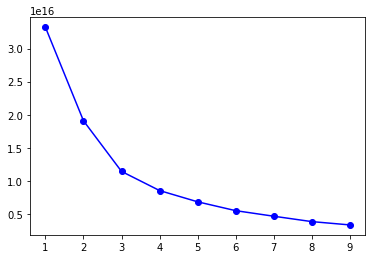

In [103]:
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1, 10), dist, 'bo-')
plt.show()


In [104]:
cluster  = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
# create 'cluster' column
cluster_data_final['cluster'] = cluster.fit_predict(cluster_data_final)

In [105]:
# Cluster centers
centroids = cluster.cluster_centers_

In [106]:
# Within cluster sum of squares
wcss = km.inertia_

In [107]:
centroids

array([[ 4.98674917e+00,  2.46264433e+00,  1.30607086e+01,
         1.28476894e+02,  2.69281490e+00,  4.88963385e-03,
         6.71984019e+00,  2.68668702e+00,  8.03160373e+00,
         5.12600591e+04,  1.89868701e+04,  7.61234372e-01,
         9.35934430e-01,  5.83623235e+04,  4.23446624e+03,
         8.83214990e+03,  1.40492763e+04,  6.04115261e+01,
         7.97260309e+02],
       [ 5.00000000e+00,  1.63054187e+00,  1.12019704e+01,
         1.79810345e+02,  3.29310345e+00, -3.38271078e-17,
         2.03940887e+00,  2.88916256e+00,  2.56502463e+01,
         4.96062537e+04,  1.99533030e+04,  5.41871921e-01,
         1.08866995e+00,  5.57817177e+06,  3.96043691e+04,
         3.66773454e+04,  7.63168797e+04,  2.27644877e+02,
         1.27087394e+03],
       [ 4.98475629e+00,  2.52013422e+00,  1.47495047e+01,
         1.36381978e+02,  2.85615878e+00,  4.89606056e-03,
         6.69474803e+00,  2.71501743e+00,  1.08652324e+01,
         5.05773670e+04,  1.88191325e+04,  7.73377578e-01,
    

In [108]:
wcss

3382376590195402.5

In [109]:
for col in cluster_data_final[cluster_data_final['cluster']==0].columns:
    print(cluster_data_final[col].mode())

0    5
dtype: int32
0    2
dtype: int32
0    13
dtype: int32
0    196
dtype: int32
0    4
dtype: int32
0    0
dtype: int64
0    5
dtype: int32
0    3
dtype: int32
0    0
dtype: int64
0    64798
dtype: int32
0    19997
dtype: int32
0    1
dtype: int32
0    0
dtype: int32
0    1
dtype: int64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    1.0
dtype: float64
0    0.0
dtype: float64
0    0
dtype: int32


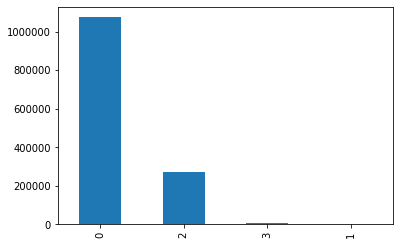

In [110]:
cluster_data_final["cluster"].value_counts().plot(kind='bar')

In [119]:
cluster_data_final_non_categorical = cluster_data_final[['KMs Reading', 'Labour Total', 'Parts Total',
                                     'Total Amt Wtd Tax.','Order Quantity','Net value',"cluster"]]

In [120]:
cluster_data_final_cluster = pd.concat([cluster_data_categorical,cluster_data_final_non_categorical],axis=1)

In [121]:
cluster_data_final_cluster.to_csv("cluster_final4.csv")

In [123]:
cluster_data_final.head()

,Cust Type,Order Type,Make,Model,ServiceTime_category,Partner Type,Data Origin,Sales organization,Order Item,Material,Description,Item Category,Target quantity UoM,KMs Reading,Labour Total,Parts Total,Total Amt Wtd Tax.,Order Quantity,Net value,cluster
0,5,2,5,79,3,0,9,1,0,62233,6849,1,0,65714,1802.05,399.73,2201.78,1.0,106.68,0
1,5,2,5,79,3,0,9,1,1,62548,15270,1,0,65714,1802.05,399.73,2201.78,1.0,74.68,0
2,5,2,5,79,3,0,9,1,2,62481,17103,1,0,65714,1802.05,399.73,2201.78,1.0,13.34,0
3,5,2,5,79,3,0,9,1,3,62367,4355,1,0,65714,1802.05,399.73,2201.78,3.0,195.25,0
4,5,2,5,79,3,0,9,1,4,62330,10562,1,0,65714,1802.05,399.73,2201.78,0.5,9.78,0


In [122]:
cluster_data_final_cluster.head()

,Cust Type,Order Type,Make,Model,ServiceTime_category,Partner Type,Data Origin,Sales organization,Order Item,Material,Description,Item Category,Target quantity UoM,KMs Reading,Labour Total,Parts Total,Total Amt Wtd Tax.,Order Quantity,Net value,cluster
0,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,10,FFSBULB006,"BULB H1,12V,80W,P145S",P002,EA,65714,1802.05,399.73,2201.78,1.0,106.68,0
1,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,20,FFSHOLDER001,HEAD LIGHT HOLDER,P002,EA,65714,1802.05,399.73,2201.78,1.0,74.68,0
2,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,30,FFSCO76,INSULATION TAPE,P002,EA,65714,1802.05,399.73,2201.78,1.0,13.34,0
3,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,40,FFSCO273,BALANCE WEIGHT STICKER,P002,EA,65714,1802.05,399.73,2201.78,3.0,195.25,0
4,Retail,Paid Service,FORD,FIESTA,super_fast,1.0,Z010,MFCB,50,FFSCO230,DISTILLED WATER,P002,EA,65714,1802.05,399.73,2201.78,0.5,9.78,0
